## Generic System

We can do  a model where we simulate the action of 

$GI \rightarrow Plasma \rightarrow \emptyset$

Where:

$\frac{dC_{GI}}{dt} = -K_a*C_{GI} \tag{1}$

represents the transport from the gut to the plasma and 

$ \frac{dC_{p}}{dt} = K_a*C_{GI} - K_{e}*C_p \tag{2}$

represents the absorption from the gut minus the elimination from the plasma.

For some time period $T$, we use a callback function in julia to simulate the appearance of more drug in the GI compartment.

In [37]:
using Pkg
Pkg.activate(".")

In [38]:
using Plots, OrdinaryDiffEq

In [39]:
#Create ODE Object
function dCdt(du, u, p, t)
    Ka, Ke = p
    du[1] = -Ka*u[1] #Where u[1] = C_GI & u[2] = C_P
    du[2] = Ka*u[1] - Ke*u[2] 
end

dCdt (generic function with 1 method)

Instead of what I did before, I use a 20:1 ratio of $K_a:K_e$. 

In [40]:
#Set Parameters
Ka = 1 #h^-1
Ke = 0.02 #mmol/(L*h)
dosetimes = 0:6:168 # we will dose every 6 hours 

0:6:168

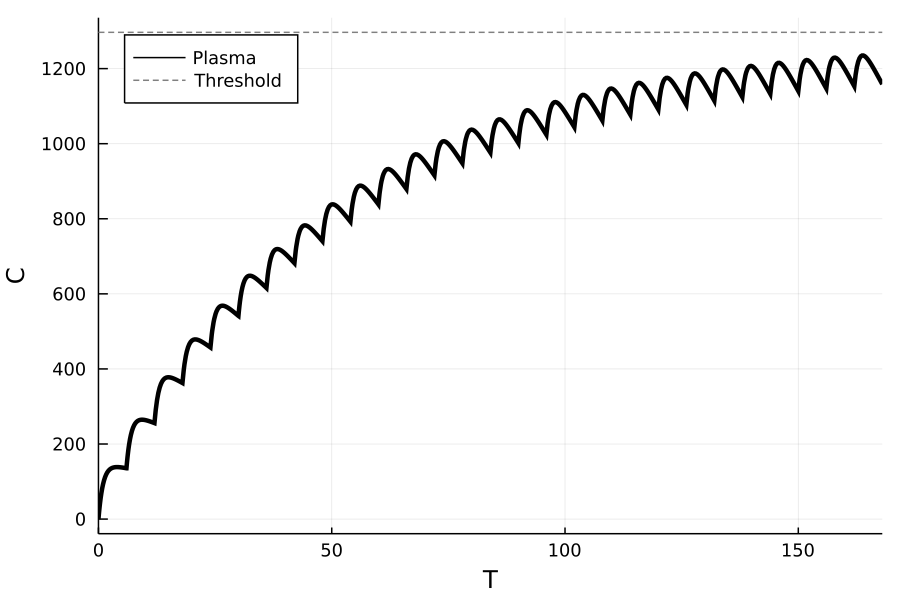

In [41]:
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 #add this concentration to the GI compartment
cb = DiscreteCallback(condition,affect!)
tspan = (0, 168) #Time range
u0 = [150, 0] #initial concentrations in GI and Plasma compartment respectively
p = [Ka, Ke]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, color = :black, width = 3, xlim = tspan)
thresh = maximum(sol[2, :])*1.05
plot!([0,168], [thresh, thresh], label = "Threshold", color = :gray, line = :dash)

While we see a similar effect, it is much less much pronounced and the jumps are much more consistent as a result. If we then look at concentration in the GI and Plasma.

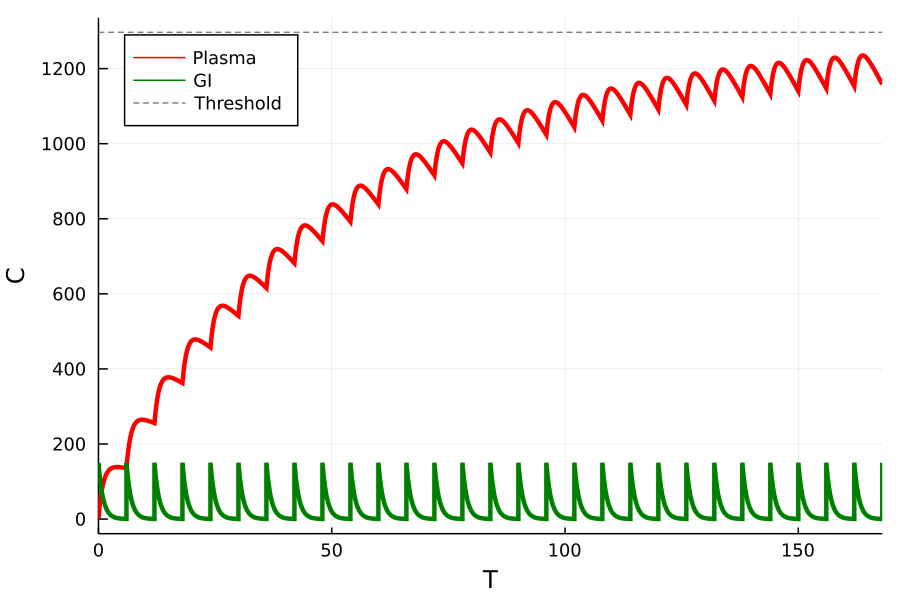

In [42]:
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, color = :red, width = 3, xlim = tspan)
plot!(sol.t, sol[1,:]; xlabel = "T", ylabel = "C", label = "GI", legend = :topleft, dpi = 150, color = :green, width = 3, xlim = tspan)
thresh = maximum(sol[2, :])*1.05
plot!([0,168], [thresh, thresh], label = "Threshold", color = :gray, line = :dash)

We see that Plasma concentrations are much higher than GI concentration. 

Let us also take a look at the absorption term and elimination term in equation (2)

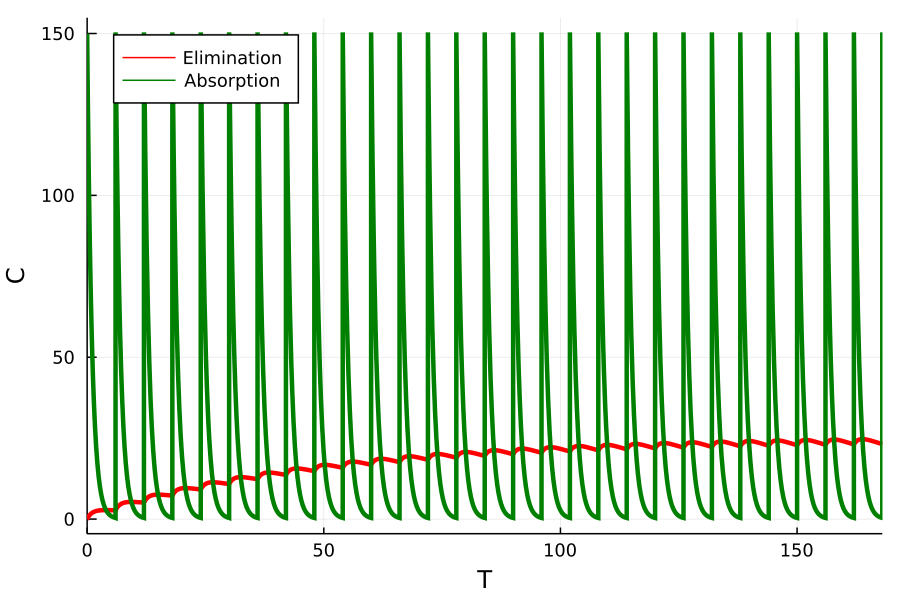

In [44]:
plot(sol.t, Ke.*sol[2,:]; xlabel = "T", ylabel = "C", label = "Elimination", legend = :topleft, dpi = 150, color = :red, width = 3, xlim = tspan)
plot!(sol.t, Ka.*sol[1,:]; xlabel = "T", ylabel = "C", label = "Absorption", legend = :topleft, dpi = 150, color = :green, width = 3, xlim = tspan)